In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../input/BES/stratbr_grid_v1.0.1/"
geo_model = gp.create_model("StratBR_BES_v2.0.1")

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 179000, 0, 148000, -20000, 0],
    resolution=[50, 50, 50],
    path_i=data_path + "surface_strat_reduced_points_with_holder_2.csv",
    path_o=data_path + "orientations_points.csv",
)

Active grids: ['regular']


StratBR_BES_v2.0.1  2023-09-19 11:00

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,bes,Default series,1,#015482,1
1,base,Default series,2,#9f0052,2
2,basement,Basement,1,#ffbe00,3


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": ("bes"),
        "Strat_Series_2": ("base"),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,bes,Strat_Series,1,#015482,1
1,base,Strat_Series_2,1,#9f0052,2
2,basement,Basement_series,1,#ffbe00,3


In [ ]:
"""# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": ("bes", "base"),
        "Strat_Series_2": ("base"),
        "Basement_series": ("basement",),
    },
)"""

In [5]:
geo_model.get_data()

X       Y      Z    smooth surface           G_x  \
surface_points 0           0       0  -3336  0.000002     bes           NaN   
               1           0    1000  -3302  0.000002     bes           NaN   
               2           0    2000  -3239  0.000002     bes           NaN   
               3           0    3000  -3182  0.000002     bes           NaN   
               4           0    4000  -3161  0.000002     bes           NaN   
...                      ...     ...    ...       ...     ...           ...   
               11022  179000  145000 -14930  0.000002    base           NaN   
               11023  179000  146000 -14928  0.000002    base           NaN   
               11024  179000  147000 -14926  0.000002    base           NaN   
               11025  179000  148000 -14921  0.000002    base           NaN   
orientations   0           0       0  -3336  0.010000     bes  1.000000e-12   

                               G_y  G_z  
surface_points 0               NaN  NaN  
               1               NaN  NaN  
               2               NaN  NaN  
               3               NaN  NaN  
               4               NaN  NaN  
...                            ...  ...  
               11022           NaN  NaN  
               11023           NaN  NaN  
               11024           NaN  NaN  
               11025           NaN  NaN  
orientations   0      1.000000e-12  1.0  

[11027 rows x 8 columns]

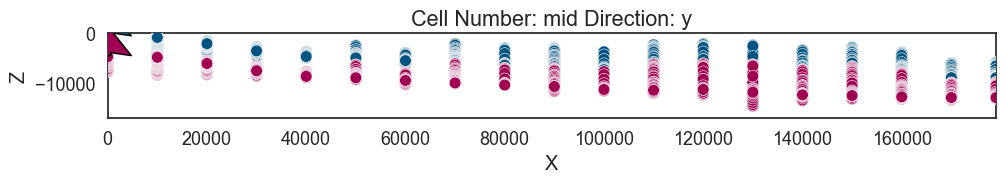

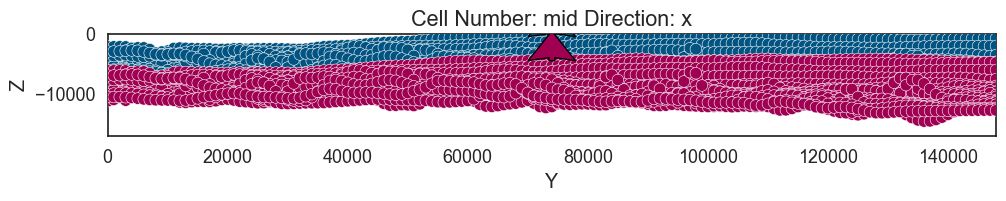

In [5]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=1, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=1, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [7]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=2,
)

In [8]:
%%time
gp.set_interpolator(
    geo_model,
    theano_optimizer='fast_run', # fast_compile, fast_run
    compile_theano=True, 
    dtype="float64",  # for model stability
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                             values
range                232881.944341
$C_o$            1291285714.285714
drift equations          [3, 3, 3]
CPU times: total: 16.9 s
Wall time: 17.4 s


In [9]:
%%time
sol=gp.compute_model(geo_model, compute_mesh=True)

CPU times: total: 14min 8s
Wall time: 2min 6s


In [8]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                             values
range                232881.944341
$C_o$            1291285714.285714
drift equations             [3, 3]
Wall time: 21.6 s


In [9]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

Wall time: 4min 47s



Lithology ids 
  [1.         1.         1.         ... 2.98207656 2.99040002 2.99499948] 

In [10]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

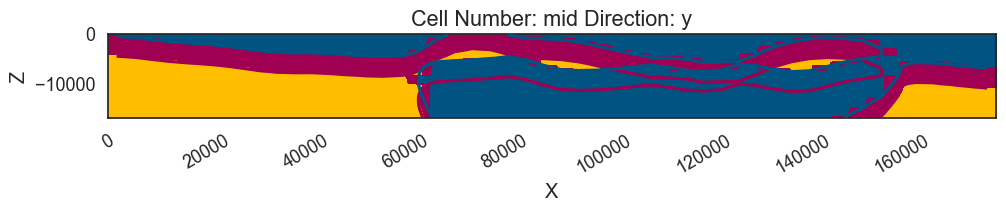

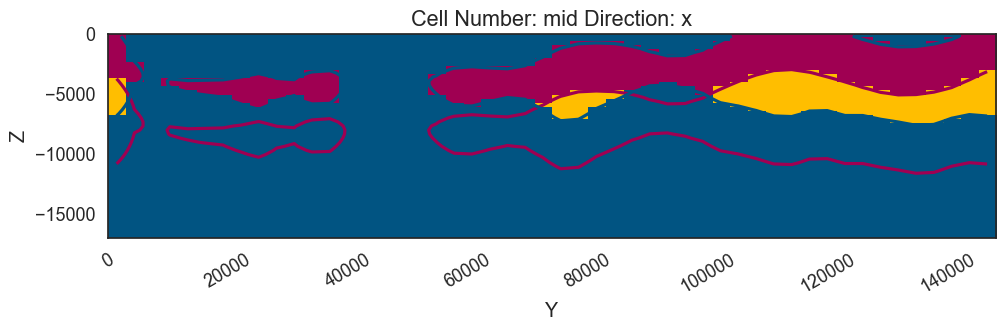

In [10]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [11]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, ve=2, image=False, plotter_type="basic", show_data=False)

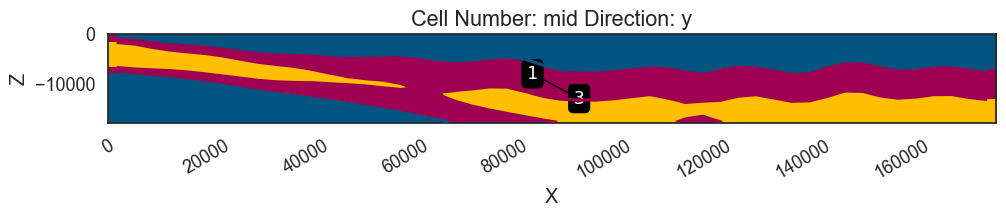

In [13]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../output/",
    compress=True,
)